In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
from scipy import signal
import scipy
from pydlm import dlm, autoReg

## Aim
Build a Dynamic linear model of the data in the form:


$y_{t+1} = b_t+\phi_t y_t+\epsilon_t$

$b_t = b_{t-1} + \omega_{b,t-1}$

$\phi_t = \phi_t + \omega_{\phi, t-1}$

Where $y_t$ is the observable at time t, $b_t$ is its true level, and $\epsilon_t, \omega_{b,t}$ and $\omega_{\phi,t}$ are different sources of random noise, respectively responding to the distributions $\mathcal{N}(0,\sigma_y^2), \mathcal{N}(0,\sigma_b^2)$ and $\mathcal{N}(0,\sigma_\phi^2)$

In [3]:
data_path = "..\\Datasets\\Forecasting_aqua\\data_h_rolling_interpolated.csv"
format = "%d/%m/%Y"
df = pd.read_csv(data_path,index_col='Datetime')
df.index = pd.to_datetime(df.index)

Start with an example serie

In [5]:
y = df['nauplius'].dropna().to_numpy()

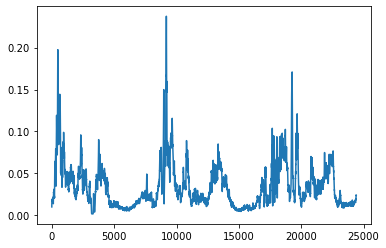

In [6]:
plt.plot(y)

In [28]:
state_space = np.ones((2,len(y)))
state_space[1,:]=y

In [32]:
params = np.zeros((len(y),2))

In [33]:
params.shape

(24404, 2)

In [23]:
myDLM.ls()

There is no static component.
 
There is no dynamic component.
 
The automatic components are
model (dimension = 2)


In [24]:
myDLM.fitForwardFilter()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.


In [25]:
myDLM.getLatentState()

[[0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],

C:\Users\valla\Anaconda3\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


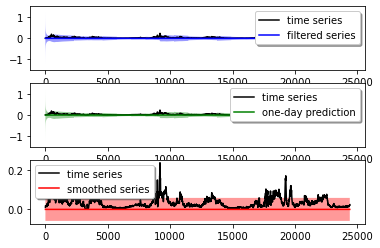

In [12]:
myDLM.plot()

In [68]:
(predictMean, predictVar) = myDLM.predictN(N=15, date=10000)

In [69]:
myDLM.n

24590

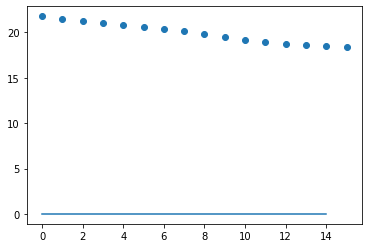

In [73]:
plt.plot(predictMean)
plt.scatter(range(16),y[999:1015])

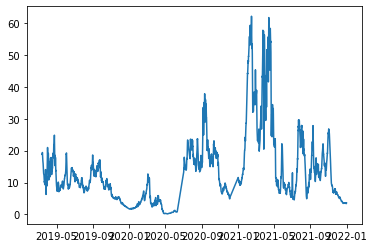

In [56]:
plt.plot(y)

In [57]:
y

Datetime
2019-01-01 00:00:00         NaN
2019-01-01 01:00:00         NaN
2019-01-01 02:00:00         NaN
2019-01-01 03:00:00         NaN
2019-01-01 04:00:00         NaN
                         ...   
2021-12-31 19:00:00    3.553174
2021-12-31 20:00:00    3.553521
2021-12-31 21:00:00    3.554561
2021-12-31 22:00:00    3.556397
2021-12-31 23:00:00    3.559155
Name: mean_chla_depth, Length: 26304, dtype: float64